<a href="https://colab.research.google.com/github/pracheetakalra/bitcoin_price_detection/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import os
import pandas as pd

This object will download the price history of bitcoin in USD fromYahoo finance

In [3]:
btc_ticker = yf.Ticker("BTC-USD")

In [4]:
btc = btc_ticker.history(period="max")

In [5]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-22 00:00:00+00:00,29995.935547,30495.998047,29679.158203,29912.281250,20653160491,0.0,0.0
2023-06-23 00:00:00+00:00,29896.382812,31389.539062,29845.214844,30695.468750,24115570085,0.0,0.0
2023-06-24 00:00:00+00:00,30708.738281,30804.148438,30290.146484,30548.695312,12147822496,0.0,0.0


In [6]:
btc.index = pd.to_datetime(btc.index)

In [7]:
del btc["Dividends"]
del btc["Stock Splits"]

In [8]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

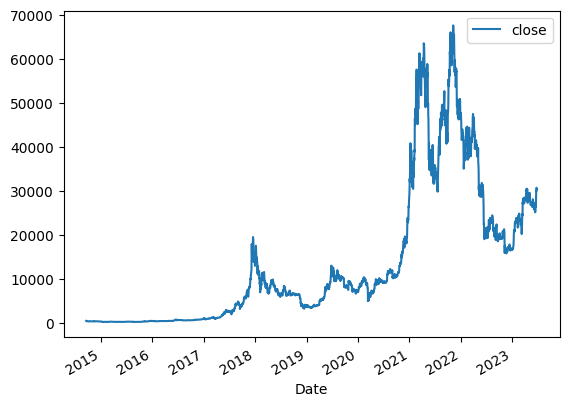

In [10]:
btc.plot.line(y="close", use_index=True)

In [16]:
wiki = pd.read_csv("/content/wikipedia_edits.csv", index_col=0, parse_dates=True)

In [17]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.100000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2023-06-23,0.266667,-0.044676,0.166667
2023-06-24,0.333333,-0.011378,0.166667
2023-06-25,0.333333,-0.011378,0.166667
2023-06-26,0.333333,-0.011378,0.166667


In [23]:
btc = btc.tz_localize(wiki.index.tz)
btc = btc.merge(wiki, left_index=True, right_index=True)

In [24]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,3.200000
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,3.233333
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,3.300000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,3.300000
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,3.300000
...,...,...,...,...,...,...,...,...
2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,20653160491,0.333333,-0.077991,0.233333
2023-06-23,29896.382812,31389.539062,29845.214844,30695.468750,24115570085,0.266667,-0.044676,0.166667
2023-06-24,30708.738281,30804.148438,30290.146484,30548.695312,12147822496,0.333333,-0.011378,0.166667
2023-06-25,30545.150391,31041.271484,30327.943359,30480.261719,12703464114,0.333333,-0.011378,0.166667


In [25]:
btc["tomorrow"] = btc["close"].shift(-1)

In [26]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,3.200000,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,3.233333,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,3.300000,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,3.300000,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,3.300000,402.152008
...,...,...,...,...,...,...,...,...,...
2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,20653160491,0.333333,-0.077991,0.233333,30695.468750
2023-06-23,29896.382812,31389.539062,29845.214844,30695.468750,24115570085,0.266667,-0.044676,0.166667,30548.695312
2023-06-24,30708.738281,30804.148438,30290.146484,30548.695312,12147822496,0.333333,-0.011378,0.166667,30480.261719
2023-06-25,30545.150391,31041.271484,30327.943359,30480.261719,12703464114,0.333333,-0.011378,0.166667,30372.689453


In [27]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [28]:
btc["target"].value_counts()

1    1702
0    1503
Name: target, dtype: int64

In [29]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,3.200000,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,3.233333,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,3.300000,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,3.300000,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,3.300000,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,20653160491,0.333333,-0.077991,0.233333,30695.468750,1
2023-06-23,29896.382812,31389.539062,29845.214844,30695.468750,24115570085,0.266667,-0.044676,0.166667,30548.695312,0
2023-06-24,30708.738281,30804.148438,30290.146484,30548.695312,12147822496,0.333333,-0.011378,0.166667,30480.261719,0
2023-06-25,30545.150391,31041.271484,30327.943359,30480.261719,12703464114,0.333333,-0.011378,0.166667,30372.689453,0


Training the baseline ML model

In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [31]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5324675324675324

Improving the model using Backtesting(respecting the order of the data while still getting predictions for as many rows as possible)

In [32]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [33]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [34]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [35]:
predictions["predictions"].value_counts()

1    1258
0     852
Name: predictions, dtype: int64

In [36]:
precision_score(predictions["target"], predictions["predictions"])

0.5031796502384738

In [37]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]

        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [38]:
btc, new_predictors = compute_rolling(btc.copy())

In [39]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,3.200000,424.440002,0,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,3.233333,394.795990,0,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,3.300000,408.903992,1,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,3.300000,398.821014,0,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,3.300000,402.152008,1,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,20653160491,0.333333,-0.077991,0.233333,30695.468750,1,...,0.5,1.077685,0.333333,0.714286,1.092175,0.168333,0.500000,1.339642,0.551507,0.471233
2023-06-23,29896.382812,31389.539062,29845.214844,30695.468750,24115570085,0.266667,-0.044676,0.166667,30548.695312,0,...,0.5,1.081586,0.323810,0.714286,1.118613,0.168889,0.516667,1.373098,0.550228,0.471233
2023-06-24,30708.738281,30804.148438,30290.146484,30548.695312,12147822496,0.333333,-0.011378,0.166667,30480.261719,0,...,0.5,1.054970,0.323810,0.571429,1.111751,0.170556,0.500000,1.364974,0.549132,0.468493
2023-06-25,30545.150391,31041.271484,30327.943359,30480.261719,12703464114,0.333333,-0.011378,0.166667,30372.689453,0,...,0.0,1.031518,0.323810,0.571429,1.107878,0.172222,0.483333,1.360421,0.547945,0.465753


In [40]:
predictions = backtest(btc, model, new_predictors)

In [41]:
precision_score(predictions["target"], predictions["predictions"])

0.5374531835205992

In [42]:
predictions

,target,predictions
2017-09-16,0,1
2017-09-17,1,0
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2023-06-22,1,1
2023-06-23,0,0
2023-06-24,0,0
2023-06-25,0,0
